In [114]:
# Módulo/bibliotecas utilizadas
import numpy as np
import pandas as pd
import xarray as xr
import datetime
import matplotlib.pyplot as plt
from windrose import WindroseAxes

In [99]:
# Define caminhos de input e output
URL = ''   # url de dados (input)
DATA_PATH = '../data/fundeio_w333/woce_acm12_230m.nc'
IMG_PATH  = '../img/'                  # diretório de imagens (output)

In [100]:
# Lê os dados e metadados em formato NetCDF
ds = xr.open_dataset(DATA_PATH)

In [101]:
ds

<xarray.Dataset>
Dimensions:      (time: 8325, depth: 1, latitude: 1, longitude: 1)
Coordinates:
  * time         (time) datetime64[ns] 1991-01-03T02:00:00 ... 1992-11-26T18:...
  * depth        (depth) float32 230.0
  * latitude     (latitude) float32 -27.9
  * longitude    (longitude) float32 -46.7
Data variables:
    woce_date    (time) int32 ...
    woce_time    (time) float32 ...
    speed        (time) float32 ...
    direction    (time) float32 ...
    u            (time) float32 ...
    v            (time) float32 ...
    temperature  (time) float32 ...
    pressure     (time) float32 ...
Attributes: (12/15)
    WOCE_Version:         3.0
    conventions:          COARDS/WOCE
    EXPOCODE:             06MT15_2, 06MT22_2
    experiment_name:      Deep Basin (ACM12)
    mooring_name:         BW/333
    pi_name:              W.Zenk
    ...                   ...
    instrument_depth:     230.0 m
    seafloor_depth:        1175 m
    sampling_interval:     120 min
    earliest_start_time:  03-jan-1991 02:00:00
    latest_stop_time:     26-nov-1992 18:00:00
    missing_value:        -999.9

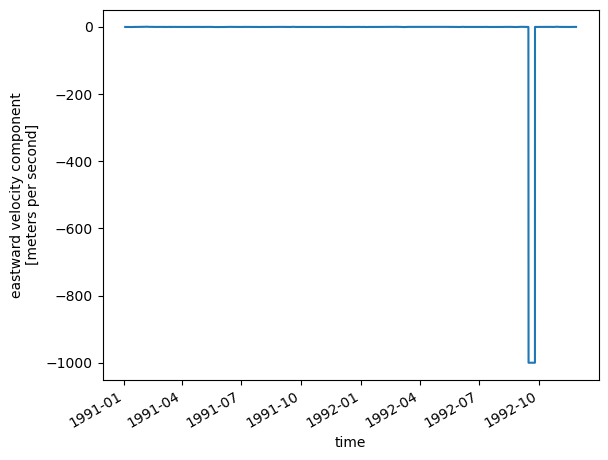

In [102]:
ds.u.plot()

In [103]:
ds = ds.where(ds.u != -999.9)

Text(0, 0.5, 'Velocidade [m/s]')

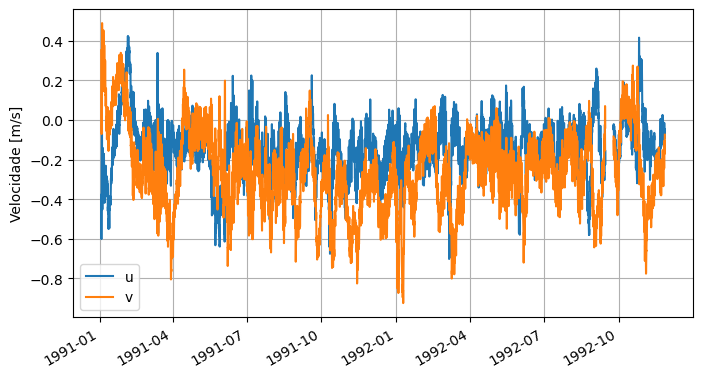

In [113]:
# Plotes em linha simples
fig, ax = plt.subplots(figsize=(8,4))
ds.u.plot(label='u')
ds.v.plot(label='v')
plt.grid()
plt.legend()
ax.set_xlabel('')
ax.set_ylabel('Velocidade [m/s]')

In [106]:
# Função para plots tipo stickplot
def stick_plot(time, u, v, **kw):
    width = kw.pop('width', 0.002)
    headwidth = kw.pop('headwidth', 0)
    headlength = kw.pop('headlength', 0)
    headaxislength = kw.pop('headaxislength', 0)
    angles = kw.pop('angles', 'uv')
    ax = kw.pop('ax', None)
    
    if angles != 'uv':
        raise AssertionError("Stickplot angles must be 'uv' so that"
                             "if *U*==*V* the angle of the arrow on"
                             "the plot is 45 degrees CCW from the *x*-axis.")

    time, u, v = map(np.asanyarray, (time, u, v))
    if not ax:
        fig, ax = plt.subplots()
    
    q = ax.quiver(time, [[0]*len(time)], u, v,
                  angles='uv', width=width, headwidth=headwidth,
                  headlength=headlength, headaxislength=headaxislength,
                  **kw)

    ax.axes.get_yaxis().set_visible(False)
    ax.xaxis_date()
    return q

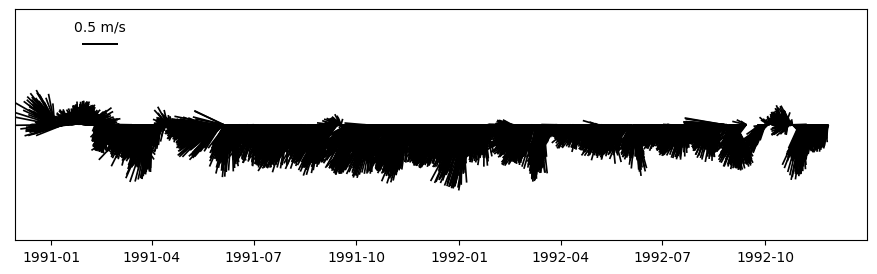

In [107]:
# Stickplot de velocidade (janeiro de 1991 a novembro de 1992)
fig, ax = plt.subplots(figsize=(11, 3.))

q = stick_plot(ds.time, ds.u, ds.v, ax=ax, width=0.002, color='k',scale=12)

ref = 0.5
qk = ax.quiverkey(q, 0.1, 0.85, ref,
                  "%s m/s" % ref,
                  labelpos='N', coordinates='axes')

(7670.0, 7701.0)

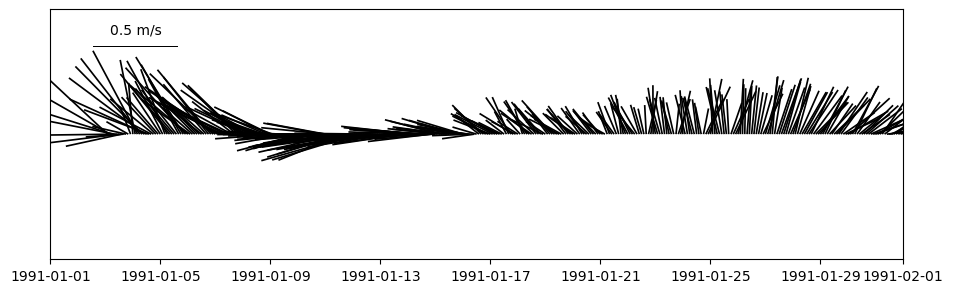

In [108]:
# Stickplot de velocidade (janeiro de 1991)
fig, ax = plt.subplots(figsize=(11, 3.25))

q = stick_plot(ds.time, ds.u, ds.v, ax=ax, width=0.002, color='k',scale=5)

ref = 0.5
qk = ax.quiverkey(q, 0.1, 0.85, ref,
                  "%s m/s" % ref,
                  labelpos='N', coordinates='axes')

ax.set_xlim(np.datetime64('1991-01-01'),np.datetime64('1991-02-01'))

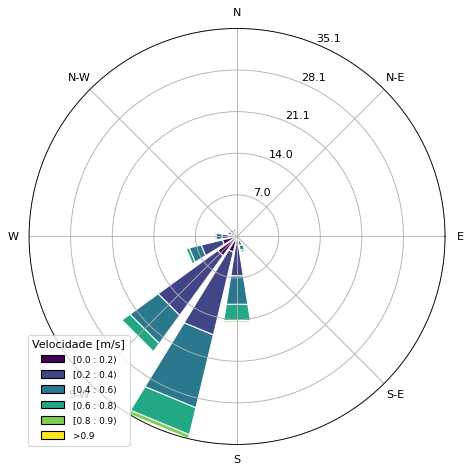

In [112]:
# Rosa dos correntes
ax = WindroseAxes.from_ax(figsize=(6.5,6.5))
ax.bar(ds.direction, ds.speed, normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title='Velocidade [m/s]')